# Building an XGBoost Model for Airline Passenger Satisfaction Prediction

## Overview
This project focuses on using machine learning techniques to predict airline passenger satisfaction. By leveraging the XGBoost algorithm, we aim to build a robust model that can accurately classify passengers as satisfied or dissatisfied based on various features such as flight distance, seat comfort, and service quality.

## Objective
Develop a machine learning model using XGBoost to predict passenger satisfaction. The project will cover the complete machine learning pipeline, including data preprocessing, feature engineering, model training, hyperparameter tuning, and evaluation.

## Learning Outcomes
1. Understand the importance of data preprocessing and feature engineering in machine learning.
2. Learn to implement and tune the XGBoost algorithm for classification tasks.
3. Gain experience in evaluating model performance using metrics such as accuracy, precision, recall, and F1 score.
4. Explore feature importance and interpret model results.
5. Compare the performance of XGBoost with other models like Decision Trees and Random Forests.

---

In [33]:
import requests
import pandas as pd
from io import StringIO
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier, plot_importance
from sklearn.model_selection import GridSearchCV

## Step 1: Define the Problem
### Task:
Understand the problem and its real-world implications. Predicting passenger satisfaction can help airlines improve customer experience, optimize services, and increase customer loyalty.

### Mini-task:
Write a brief paragraph on how predicting passenger satisfaction can benefit the airline industry.

---


Predicting passenger satisfaction can greatly benefit the airline industry by enabling airlines to better understand and address the needs of their customers. By analyzing factors that influence satisfaction, airlines can identify areas for improvement in their services, such as in-flight amenities, customer service, and punctuality. This proactive approach can lead to higher customer retention, positive reviews, and increased brand loyalty. Ultimately, leveraging predictive models helps airlines optimize their operations, enhance the overall passenger experience, and maintain a competitive edge in the market.

## Step 2: Data Collection
### Task:
Collect a dataset suitable for predicting passenger satisfaction. The dataset used in this project is the `Invistico_Airline.csv`, which contains various features related to passenger experiences.

### Mini-task:
Load the dataset and inspect the first few rows to understand its structure.

#### Hint:
Use the `pandas` library to load the dataset and display the first 10 rows.

```python
import pandas as pd

# Load the dataset
airline_data = pd.read_csv('..\sample_data\Invistico_Airline.csv')

# Display the first 10 rows
### YOUR CODE HERE ###
```

---


In [34]:
# Import Data Files from Google Drive


def read_gd(sharingurl):
    file_id = sharingurl.split('/')[-2]
    download_url='https://drive.google.com/uc?export=download&id=' + file_id
    url = requests.get(download_url).text
    csv_raw = StringIO(url)
    return csv_raw

url = "https://drive.google.com/file/d/1gG0NpYi2hUh8oaYJg7tIsb157D0Qgpzt/view?usp=sharing"
gdd = read_gd(url)

airline_data = pd.read_csv(gdd)
airline_data.to_csv('data/airline_data.csv', index=False)

airline_data.head()

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0



## Step 3: Exploratory Data Analysis (EDA)
### Task:
Analyze the dataset to understand the distribution of features, identify missing values, and explore relationships between variables.

### Mini-task:
Visualize the distribution of the target variable (satisfaction) and inspect the data types of each column.

#### Hint:
Use `value_counts()` to check the distribution of the target variable and `dtypes` to inspect the data types.

```python
import matplotlib.pyplot as plt

# Visualize the distribution of the target variable
### YOUR CODE HERE ###

# Display data types
### YOUR CODE HERE ###
```

---


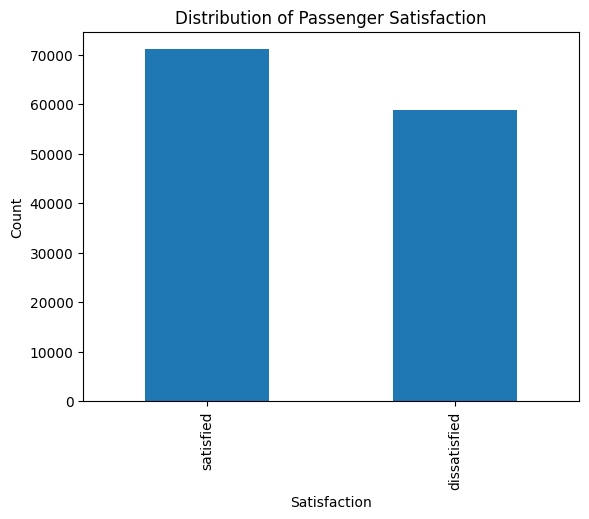

satisfaction                          object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
dtype: obj

In [41]:
# Visualize the distribution of the target variable
airline_data['satisfaction'].value_counts().plot(kind='bar')
plt.title('Distribution of Passenger Satisfaction')
plt.xlabel('Satisfaction')
plt.ylabel('Count')
plt.savefig('media/module2/satisfaction_distribution.png')
plt.show()

# Display data types
print(airline_data.dtypes)


## Step 4: Data Preprocessing
### Task:
Preprocess the data to prepare it for modeling. This includes handling missing values, encoding categorical variables, and splitting the data into training and testing sets.

### Mini-task:
Convert categorical variables into numerical format using one-hot encoding and split the data into training and testing sets.

#### Hint:
Use `pd.get_dummies()` to encode categorical variables and `train_test_split()` to split the data.

```python
from sklearn.model_selection import train_test_split

# Convert categorical variables to numerical using one-hot encoding
### YOUR CODE HERE ###

# Define the target variable and features
### YOUR CODE HERE ###

# Split the data into training and testing sets
### YOUR CODE HERE ###
```

---


In [36]:
# Check unique values in the satisfaction column
print(airline_data['satisfaction'].unique())

# One-hot encode without dropping the first to see all columns
airline_data_encoded = pd.get_dummies(airline_data, drop_first=False)

# Check which satisfaction columns were created
print([col for col in airline_data_encoded.columns if 'satisfaction' in col])

# Choose the correct target column
# For example, if you see 'satisfaction_satisfied' (all lowercase), use that
# Or, if the column is just 'satisfaction', use label encoding instead:

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(airline_data['satisfaction'])
X = airline_data_encoded.drop(['satisfaction_dissatisfied', 'satisfaction_satisfied'], axis=1)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

['satisfied' 'dissatisfied']
['satisfaction_dissatisfied', 'satisfaction_satisfied']


## Step 5: Model Training Using XGBoost
### Task:
Train an XGBoost model on the preprocessed data. Perform hyperparameter tuning using GridSearchCV to find the optimal parameters.

### Mini-task:
Define the XGBoost classifier and perform hyperparameter tuning.

#### Hint:
Use `XGBClassifier()` and `GridSearchCV()` to tune hyperparameters like `max_depth`, `learning_rate`, and `n_estimators`.

```python
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Define the XGBoost classifier
### YOUR CODE HERE ###

# Define the parameters for hyperparameter tuning
### YOUR CODE HERE ###

# Perform GridSearchCV
### YOUR CODE HERE ###

# Display the best parameters
### YOUR CODE HERE ###
```

---

In [37]:
# Define the XGBoost classifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Define the parameters for hyperparameter tuning
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200]
}

# Perform GridSearchCV
grid_search = GridSearchCV(xgb, param_grid, cv=3, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

# Display the best parameters
print("Best parameters:", grid_search.best_params_)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


c:\Users\onuoh\.virtualenvs\3mtt-ai-ml-mini-projects-ViWCxpd9\Lib\site-packages\xgboost\training.py:183: UserWarning: [00:50:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\onuoh\.virtualenvs\3mtt-ai-ml-mini-projects-ViWCxpd9\Lib\site-packages\xgboost\training.py:183: UserWarning: [00:50:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\onuoh\.virtualenvs\3mtt-ai-ml-mini-projects-ViWCxpd9\Lib\site-packages\xgboost\training.py:183: UserWarning: [00:51:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\onuoh\.virtualenvs\3mtt-ai-ml-mini-projects-ViWCxpd9\Lib\site-packages\xgboost\training.py:183: UserWarning: 

Best parameters: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200}



## Step 6: Model Evaluation
### Task:
Evaluate the model's performance using metrics such as accuracy, precision, recall, and F1 score. Visualize the results using a confusion matrix and feature importance plot.

### Mini-task:
Evaluate the model on the test set and visualize the confusion matrix and feature importance.

#### Hint:
Use `accuracy_score()`, `precision_score()`, `recall_score()`, and `f1_score()` to evaluate the model. Use `confusion_matrix()` and `plot_importance()` for visualization.

```python
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Predict on the test set
### YOUR CODE HERE ###

# Calculate evaluation metrics
### YOUR CODE HERE ###

# Plot the confusion matrix
### YOUR CODE HERE ###

# Plot feature importance
### YOUR CODE HERE ###
```

---

Accuracy: 0.9594625808438558
Precision: 0.9700539313085439
Recall: 0.9558772113838193
F1 Score: 0.9629133941464445


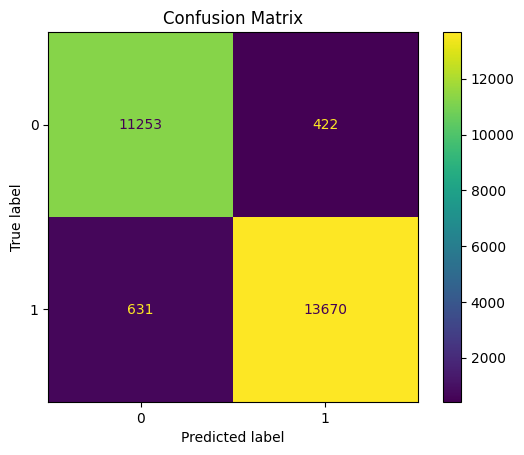

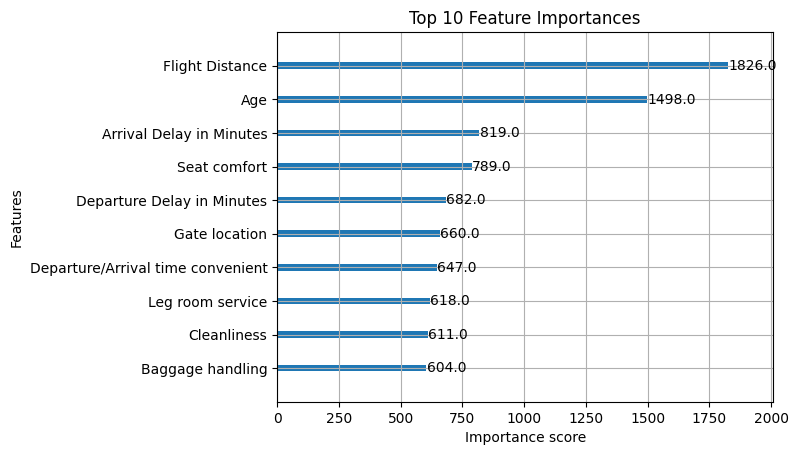

In [40]:
# Predict on the test set
y_pred = grid_search.predict(X_test)
# Calculate evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix")
plt.savefig('media/module2/confusion_matrix.png')
plt.show()

# Plot feature importance
plot_importance(grid_search.best_estimator_, max_num_features=10)
plt.title("Top 10 Feature Importances")
plt.savefig('media/module2/feature_importance.png')
plt.show()


## Step 7: Model Comparison (Optional)
### Task:
Compare the performance of the XGBoost model with other models like Decision Trees and Random Forests.

### Mini-task:
Train a Decision Tree and Random Forest model, and compare their performance with the XGBoost model.

#### Hint:
Use `DecisionTreeClassifier()` and `RandomForestClassifier()` to train the models and compare their accuracy.

```python
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Train a Decision Tree model
### YOUR CODE HERE ###

# Train a Random Forest model
### YOUR CODE HERE ###

# Compare model performance
### YOUR CODE HERE ###
```

---

In [39]:

# Train a Decision Tree model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_acc = accuracy_score(y_test, dt_pred)
print("Decision Tree Accuracy:", dt_acc)

# Train a Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)
print("Random Forest Accuracy:", rf_acc)

# Compare model performance
xgb_acc = accuracy_score(y_test, grid_search.predict(X_test))
print("XGBoost Accuracy:", xgb_acc)

# Optionally, display all results together
print("\nModel Comparison:")
print(f"XGBoost:       {xgb_acc:.4f}")
print(f"Random Forest: {rf_acc:.4f}")
print(f"Decision Tree: {dt_acc:.4f}")

Decision Tree Accuracy: 0.9368647982753311
Random Forest Accuracy: 0.9578842008007391
XGBoost Accuracy: 0.9594625808438558

Model Comparison:
XGBoost:       0.9595
Random Forest: 0.9579
Decision Tree: 0.9369


## Considerations
**What are some key takeaways you learned from this project?**
- Reflect on the importance of hyperparameter tuning and feature engineering.
- Consider how the model's insights can be applied to improve airline services.

**How would you share your findings with a team?**
- Prepare a presentation with visualizations and key metrics.
- Discuss the impact of different features on passenger satisfaction.

**What would you share with and recommend to stakeholders?**
- Highlight the key features that contribute most to passenger satisfaction.
- Recommend strategies to improve services based on the model's insights.

## Considerations

**What are some key takeaways you learned from this project?**
- The importance of thorough data preprocessing and feature engineering in building effective machine learning models.
- Hyperparameter tuning can significantly improve model performance.
- XGBoost often outperforms traditional models like Decision Trees and Random Forests for classification tasks.
- Understanding feature importance helps identify which factors most influence passenger satisfaction.

**How would you share your findings with a team?**
- Prepare a clear presentation with visualizations (such as confusion matrices and feature importance plots) and key performance metrics.
- Summarize the modeling process, results, and insights in a concise report or slide deck.
- Highlight actionable insights and recommendations based on the model’s findings.

**What would you share with and recommend to stakeholders?**
- Present the most important features affecting passenger satisfaction, such as service quality, seat comfort, and flight punctuality.
- Recommend targeted improvements in areas that most impact satisfaction, as identified by the model.
- Suggest ongoing monitoring and model updates as more data becomes available to maintain and improve prediction accuracy.